# What is machine learning?

Machine learning is the study and use of algorithms that can learn from and make predictions on data.

Machine learning problems generally fall into one of two types:

1. **Supervised learning**: Our data has associated attributes that we would like to predict.
    * Regression: The attributes that we would like to predict are continuous.
    * Classification: We would like to classify each data point as one of a finite number of categories.
2. **Unsupervised learning**: Our data does not have a corresponding set of target values. Examples:
    * Clustering: Discover groups of similar examples within the data.
    * Visualization: Project the data down from a high-dimensional sapce to two or three dimensions.

## Example: supervised learning (regression) with Linear Regression
References:
 * http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
 * https://chrisalbon.com/machine-learning/linear_regression_scikit-learn.html

In [66]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Load the diabetes dataset (http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)
# Features have been mean centered and scaled by the standard deviation times n_samples
df = pd.read_csv('data/diabetes.csv', index_col=False)

In [50]:
# Explore the data
df.head()

,age,sex,body_mass_index,avg_blood_pressure,S1,S2,S3,S4,S5,S6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Problem statement
Predict a patient's disease progression given his/her BMI.

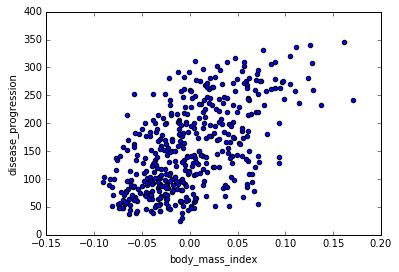

In [51]:
df.plot(x='body_mass_index', y='disease_progression', kind='scatter')

### Cross-validation

* To judge how good our model is, we need to reserve a portion of the data as the "test" dataset.
* The remaining portion of data that we train our model on is the "training" dataset
* To compare the performance of different models, we compare them on the test set. This prevents us from thinking a model is very good if it "cheats" by fitting itself exactly to the data it's training on.

In [52]:
# Break up the data into test and train sets
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75 # randomly assign 75% of data to training set
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [53]:
X_train = train['body_mass_index'].reshape(-1, 1) # 2D numpy array where rows are samples and columns are features
y_train = train['disease_progression']

X_test = test['body_mass_index'].reshape(-1, 1)
y_test = test['disease_progression']

In [54]:
# use the linear regression model from scikit-learn!
ols = linear_model.LinearRegression()

In [55]:
model = ols.fit(X_train, y_train)

In [72]:
# View the training model's slope and y-intercept
print(model.coef_)
print(model.intercept_)

[ 924.48274782]
150.607961249


In [57]:
# View the R-Squared score on the test set
model.score(X_test, y_test)

0.33481049273393659

In [62]:
model.predict(X_test)[0]

73.128519643324665

In [64]:
list(y_test)[0]

101.0

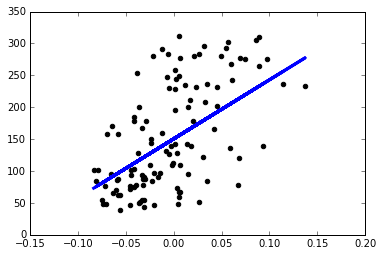

In [70]:
# Plot predicted values and actual values for the test set
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.show()

### Exercise

By appending columns to the `test` dataframe, compute the Residual Sum of Squares for the model: the sum of the squares of the differences between the predicted value and the actual y value for all samples.

## Example: supervised learning (classification) with Random Forests

Background on decision trees: https://en.wikipedia.org/wiki/Decision_tree_learning

In [73]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

We'll use the famous Iris dataset, which comes out of the box with scikit-learn. Each sample contains the sepal length, sepal width, petal length, petal width, and species of an iris.

In [80]:
iris = load_iris()

In [90]:
# load the data into a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [91]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [94]:
# add category labels to the dataframe
df['species'] = iris.target
# map the integers to their corresponding species name and add to dataframe
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Problem statement
Predict the species of an iris (setosa, versicolor, or virginica) based on its sepal length, sepal width, petal length, and petal width.

In [106]:
# create test and training data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [107]:
X_train = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_train = train['species']

X_test = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_test = test['species']

In [108]:
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=2)

In [109]:
# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
# Apply the classifier we trained to the test data
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [116]:
# How confident is the classifier that the sample belongs in each of the 3 classes?
clf.predict_proba(X_test)[0:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

## Evaluating the results

In [119]:
# create a confusion matrix
preds = iris.target_names[clf.predict(X_test)]
pd.crosstab(test['species_name'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,16,0,0
versicolor,0,6,1
virginica,0,1,12


## View feature importance


In [126]:
list(zip(iris.feature_names, clf.feature_importances_))

[('sepal length (cm)', 0.014076319812260948),
 ('sepal width (cm)', 0.011409269721648494),
 ('petal length (cm)', 0.24474923141260602),
 ('petal width (cm)', 0.7297651790534847)]